In [1]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.1     
✔ ggplot2   3.4.4          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.2          
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# read_syntenic_block_file <- read_delim("/home/jpm73279/genome_downloads/C4_markers/C4-genes.syntenic.blocks.tsv")

In [3]:
marker_file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/Os.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Pm.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Sb.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Uf.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Zm.c4_markers.bed")

# Function to read and process the file
process_file <- function(file_path) {
  species <- substr(basename(file_path), 1, 2)
  read_delim(file_path, delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
    dplyr::select("chrom","start","end","geneID","name","type") %>%
    dplyr::mutate(species = (species))
}

# Apply the function to each file and store results in a list
list_of_dataframes <- lapply(marker_file_paths, process_file)

# Optionally combine all dataframes into one if needed
markers <- bind_rows(list_of_dataframes) %>% 
    dplyr::select(geneID,name,type,species)

Rows: 30 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 52 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 33 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31 Columns: 6

In [4]:
###### Define a function to read the data and add columns
read_and_annotate_intersect <- function(file_path, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE, col_types = "cccccccccc") %>%
    dplyr::mutate(
      species = species_abbr
    )
}

files_conditions <- list(
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/os.extended_c4_genes.acr_intersection.all.bed", species = "Os"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/pm.extended_c4_genes.acr_intersection.all.bed", species = "Pm"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/sb.extended_c4_genes.acr_intersection.all.bed", species = "Sb"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/uf.extended_c4_genes.acr_intersection.all.bed", species = "Uf"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/zm.extended_c4_genes.acr_intersection.all.bed", species = "Zm")
)

# Read and annotate each file and store results in a list
annotated_data_list <- lapply(files_conditions, function(condition) {
  read_and_annotate_intersect(condition$path, condition$species)
})

# Combine results
combined_acrs_species <- bind_rows(annotated_data_list)

all_acrs_species_types <- combined_acrs_species %>% 
    ungroup() %>% 
    dplyr::left_join(., markers, by = c("species", "X5" = "name")) %>% 
    dplyr::rename(name = X5) %>% 
    dplyr::rename(enzyme_location = type,
          locus = name,
          acr_name_type = X9) %>% 
    tidyr::separate(acr_name_type, into = c("acr", "acr_cell_type_specific_class"), sep = ";") %>%
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class)) %>% 
    tidyr::separate(locus, into = c("species_other", "loci"), sep = "__",remove = FALSE) %>%
    tidyr::separate(loci, into = c("gene_family", "number"), sep = "_", remove = FALSE)


# graphing_matrix_c4_genes <- all_acrs_species_types %>% 
#     group_by(species, locus, acr_cell_type_specific_class, enzyme_location) %>% 
#     summarise(n_acrs = n())

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 5 rows [317, 318, 319,
320, 321].”


In [5]:
head(all_acrs_species_types)

X1,X2,X3,X4,locus,species_other,loci,gene_family,number,X6,X7,X8,acr,acr_cell_type_specific_class,X10,species,geneID,enzyme_location
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4737626,4738127,scACR_1056,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4738483,4738984,scACR_1057,unknown_cells_1,3.57130102496339e-05,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4742983,4743484,scACR_1058,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4744322,4744823,scACR_1059,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4745818,4746319,scACR_1060,"epidermis,protoderm,unknown_cells_1","0,7.14260204992679e-05,3.57130102496339e-05",Os,LOC_Os01g09320,mesophyll
Chr1,5898224,5911502,LOC_Os01g11054,Os__PEPC_1,Os,PEPC_1,PEPC,1,Chr1,5899326,5899827,scACR_1352,mesophyll,0,Os,LOC_Os01g11054,mesophyll


In [74]:
library(tidyverse)
library(stringr)

process_file <- function(file_info) {
  file_path <- file_info$path
  species <- file_info$species

  # Read and process the file
  read_delim(file_path, 
             col_names = c("qChr", "qStart", "qEnd", "acr_name", "pval", "refFile", "rChr", "rStart", "rEnd", "rName", "rWidth", "strand"),
             col_types = "cccccccccccc") %>%
    dplyr::mutate(species = species) %>%
    tidyr::separate(acr_name, into = c("acr", "acr_cell_type_specific_class", "locus"), sep = ";") %>%
    dplyr::mutate(
      refFile = str_replace(refFile, "\\.all_combined_regions\\.passing_regions\\.blast_passing_regions\\.intersecting_regions\\.ref\\.frac\\.bed", ""),
      refFile = str_replace(refFile, ".*\\.vs\\.", "")
    )
}

# Define file information as a list of lists
file_infos <- list(
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Os.all.ACR_conservation.intersection.bed", species = "Os"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Pm.all.ACR_conservation.intersection.bed", species = "Pm"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Sb.all.ACR_conservation.intersection.bed", species = "Sb"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Uf.all.ACR_conservation.intersection.bed", species = "Uf"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Zm.all.ACR_conservation.intersection.bed", species = "Zm")
)

# Process each file
acr_scored_conservation <- bind_rows(lapply(file_infos, process_file)) %>% 
  dplyr::filter(rName != ".") %>% 
  tidyr::separate(rName, into = c("RefFrom", "racr_name", "rcell_type", "gene_family", "gene_family2"), sep = ";") %>% 
    dplyr::select(acr, acr_cell_type_specific_class, locus, racr_name, rcell_type , gene_family, rWidth, species) %>%
    separate(racr_name, into = c("rspecies", "racr"), sep = "_(.*)", extra = "merge") %>% 
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class))




In [116]:
head(acr_scored_conservation)

qChr,qStart,qEnd,acr,acr_cell_type_specific_class,locus,pval,refFile,rChr,rStart,rEnd,RefFrom,rspecies,racr,rcell_type,gene_family,gene_family2,rWidth,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr1,4744322,4744823,scACR_1059,broadly_accessible,Os__NADPME_1,NA,Os.blast_passing_regions.intersecting_regions.bed,Chr1,4744337,4744388,RefFrom,Sb,,broadly_accessible,NADPME,NADPME,51,Os
Chr1,4744322,4744823,scACR_1059,broadly_accessible,Os__NADPME_1,NA,Os.blast_passing_regions.intersecting_regions.bed,Chr1,4744331,4744399,RefFrom,Sb,,broadly_accessible,NADPME,NADPME,68,Os
Chr1,4744322,4744823,scACR_1059,broadly_accessible,Os__NADPME_1,NA,Os.blast_passing_regions.intersecting_regions.bed,Chr1,4744380,4744429,RefFrom,Uf,,broadly_accessible,NADPME,NADPME,49,Os
Chr1,4744322,4744823,scACR_1059,broadly_accessible,Os__NADPME_1,NA,Os.blast_passing_regions.intersecting_regions.bed,Chr1,4744343,4744387,RefFrom,Zm,,broadly_accessible,NADPME,NADPME,44,Os
Chr1,4744322,4744823,scACR_1059,broadly_accessible,Os__NADPME_1,NA,Os.blast_passing_regions.intersecting_regions.bed,Chr1,4744347,4744387,RefFrom,Zm,,broadly_accessible,NADPME,NADPME,40,Os
Chr1,25696012,25696513,scACR_4586,mesophyll,Os__CA_1,0,Os.blast_passing_regions.intersecting_regions.bed,Chr1,25696393,25696421,RefFrom,Uf,,mesophyll,CA,CA,28,Os


In [164]:
library(plyranges)
acr_scored_conservation <- bind_rows(lapply(file_infos, process_file)) %>%
  dplyr::filter(rName != ".") %>% 
  tidyr::separate(rName, into = c("RefFrom", "racr_name", "rcell_type", "gene_family", "gene_family2"), sep = ";") %>% 
  tidyr::separate(racr_name, into = c("rspecies", "racr"), sep = "_(.*)", extra = "merge")

generate_ref_ranges <- acr_scored_conservation %>% 
    dplyr::mutate(r_width = as.numeric(rEnd) - as.numeric(rStart)) %>% 
    dplyr::rename(start = rStart,
                 end = rEnd, 
                width = r_width)

racr_regions <- generate_ref_ranges %>% 
    select(start, end, acr, rspecies, species) %>% 
    mutate(start = as.numeric(start),
          end = as.numeric(end))

# racr_ranges <- as_iranges(racr_regions) %>% 
#     group_by(acr, rspecies, species) %>% 
#     reduce_ranges() %>% 
#     as.data.frame()

### Generate ranges from original
# original_acr_sequence <- acr_scored_conservation %>% 
#     dplyr::mutate(qwidth = 502) %>% 
#     dplyr::select(qStart, qEnd, qwidth, acr, species) %>% 
#     dplyr::rename(start = qStart,
#                  end = qEnd, 
#                 width = qwidth) %>% 
#     mutate(start = as.numeric(start),
#             end = as.numeric(end)) %>% 
#     as_iranges()


racr_ranges <- as_iranges(racr_regions) %>% 
    plyranges::group_by(acr, species) %>% 
    plyranges::reduce_ranges() %>% 
    as.data.frame()
head(racr_ranges)

#racr_ranges_updated_only_interescting_acrs <- intersect_ranges(racr_ranges, original_acr_sequence)

,start,end,width,acr,species
,<int>,<int>,<int>,<chr>,<chr>
1,4744331,4744429,99,scACR_1059,Os
2,25696393,25696421,29,scACR_4586,Os
3,25696431,25696527,97,scACR_4586,Os
4,25700213,25700253,41,scACR_4588,Os
5,25700322,25700356,35,scACR_4588,Os
6,25700369,25700429,61,scACR_4588,Os


In [173]:
# conservation_acrs_updated_width_calculations <- acr_scored_conservation %>% 
#     dplyr::select(-rWidth) %>% 
#     dplyr::left_join(racr_ranges, by = c("acr", "species", "rspecies")) %>% 
#     dplyr::filter(width < 500) %>% 
#     dplyr::select(species, acr, acr_cell_type_specific_class, locus, rspecies, gene_family, width)
conservation_acrs_updated_width_calculations <- acr_scored_conservation %>% 
    dplyr::select(-rWidth) %>% 
    dplyr::left_join(racr_ranges, by = c("acr", "species")) %>% 
    dplyr::mutate(width = case_when(width > 500 ~ 500,
                                   TRUE ~ width)) %>% 
    dplyr::select(species, acr, acr_cell_type_specific_class, locus, width) %>% 
    dplyr::distinct() %>% 
    dplyr::group_by(species, acr,acr_cell_type_specific_class, locus) %>% 
    summarise(width = sum(width)) %>% 
    dplyr::mutate(width = case_when(width > 500 ~ 500,
                                   TRUE ~ width)) 

Warning message in dplyr::left_join(., racr_ranges, by = c("acr", "species")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 6 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
`summarise()` has grouped output by 'species', 'acr',
'acr_cell_type_specific_class'. You can override using the `.groups` argument.


In [174]:
conservation_acrs_updated_width_calculations %>% 
      dplyr::filter(width > 500)  

species,acr,acr_cell_type_specific_class,locus,width
<chr>,<chr>,<chr>,<chr>,<dbl>


In [175]:
enzyme_family_class <- data.frame(gene_family=c("AlaAT", "AspAT", "CA", "DIC", "DIT", "NADMDH", "NADME", "NADPMDH", "NADPME", "NHD", "PEPCK", "PEPC", "PPDKRP", "PPDK", "PPT", "RBCS", "RCA", "BASS"),
                                  enzyme_class=c("variable", "variable", "core", "core", "variable", "variable", "variable", "variable", "variable", "variable", "core", "core", "core", "core", "core", "core", "core", "variable"))


In [176]:
all_acrs_species_types_split_acrs <- all_acrs_species_types %>% 
    dplyr::select(locus, acr, acr_cell_type_specific_class, species, enzyme_location, gene_family) %>%  
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class))



In [177]:
head(all_acrs_species_types_split_acrs)

locus,acr,acr_cell_type_specific_class,species,enzyme_location,gene_family
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Os__NADPME_1,scACR_1056,broadly_accessible,Os,mesophyll,NADPME
Os__NADPME_1,scACR_1057,unknown_cells_1,Os,mesophyll,NADPME
Os__NADPME_1,scACR_1058,broadly_accessible,Os,mesophyll,NADPME
Os__NADPME_1,scACR_1059,broadly_accessible,Os,mesophyll,NADPME
Os__NADPME_1,scACR_1060,"epidermis,protoderm,unknown_cells_1",Os,mesophyll,NADPME
Os__PEPC_1,scACR_1352,mesophyll,Os,mesophyll,PEPC


In [178]:
all_acrs_species_types_split_acrs %>% 
    dplyr::filter(species == "Uf" & acr %in% c("scACR_25852"))
conservation_acrs_updated_width_calculations %>% 
    dplyr::filter(species == "Uf" & acr %in% c("scACR_25852"))

locus,acr,acr_cell_type_specific_class,species,enzyme_location,gene_family
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Uf__NADME_2,scACR_25852,bundle_sheath,Uf,bundle_sheath,NADME


species,acr,acr_cell_type_specific_class,locus,width
<chr>,<chr>,<chr>,<chr>,<dbl>
Uf,scACR_25852,bundle_sheath,Uf__NADME_2,500


In [184]:
enzyme_family_class <- data.frame(gene_family=c("AlaAT", "AspAT", "CA", "DIC", "DIT", "NADMDH", "NADME", "NADPMDH", "NADPME", "NHD", "PEPCK", "PEPC", "PPDKRP", "PPDK", "PPT", "RBCS", "RCA", "BASS"),
                                  enzyme_class=c("variable", "variable", "core", "core", "variable", "variable", "variable", "variable", "variable", "variable", "core", "core", "core", "core", "core", "core", "core", "variable"))


acrs_combined_conservation <- left_join(all_acrs_species_types_split_acrs,
          conservation_acrs_updated_width_calculations,
          by = c("acr", "locus","acr_cell_type_specific_class", "species")) %>% 
    dplyr::mutate(width = case_when(is.na(width) == TRUE ~ 0,
                                   TRUE ~ width)) %>% 
    distinct() %>% 
    left_join(., enzyme_family_class, by = "gene_family")

head(acrs_combined_conservation)

locus,acr,acr_cell_type_specific_class,species,enzyme_location,gene_family,width,enzyme_class
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Os__NADPME_1,scACR_1056,broadly_accessible,Os,mesophyll,NADPME,0,variable
Os__NADPME_1,scACR_1057,unknown_cells_1,Os,mesophyll,NADPME,0,variable
Os__NADPME_1,scACR_1058,broadly_accessible,Os,mesophyll,NADPME,0,variable
Os__NADPME_1,scACR_1059,broadly_accessible,Os,mesophyll,NADPME,99,variable
Os__NADPME_1,scACR_1060,"epidermis,protoderm,unknown_cells_1",Os,mesophyll,NADPME,0,variable
Os__PEPC_1,scACR_1352,mesophyll,Os,mesophyll,PEPC,0,core


In [185]:
acrs_combined_conservation %>%
    filter(acr_cell_type_specific_class %in% c("broadly_accessible", "mesophyll", "bundle_sheath", "bundle_sheath,mesophyll")) %>%
    dplyr::filter(species == "Uf" & acr %in% c("scACR_25852"))

locus,acr,acr_cell_type_specific_class,species,enzyme_location,gene_family,width,enzyme_class
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Uf__NADME_2,scACR_25852,bundle_sheath,Uf,bundle_sheath,NADME,500,variable


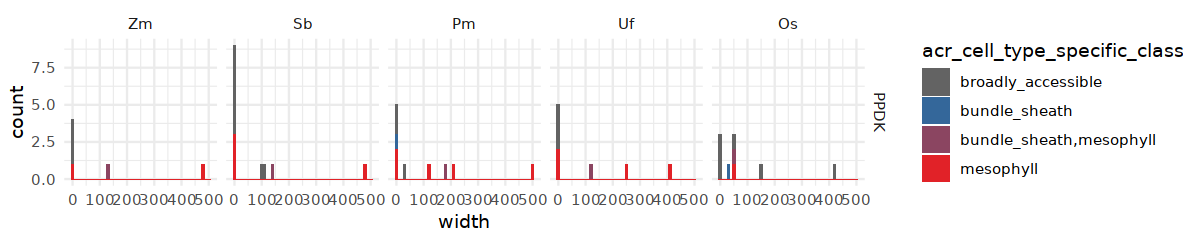

In [181]:
library(ggridges)
options(repr.plot.width=10, repr.plot.height=2)
acrs_combined_conservation %>%
    filter(acr_cell_type_specific_class %in% c("broadly_accessible", "mesophyll", "bundle_sheath", "bundle_sheath,mesophyll")) %>%
    filter(gene_family == "PPDK") %>% 
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = width, fill = acr_cell_type_specific_class)) +
    geom_histogram(binwidth = 10) +
    facet_grid(gene_family ~ species) + 
    scale_fill_manual(values = c("broadly_accessible" = "#636363", 
                                 "mesophyll" = "#E12228", 
                                 "bundle_sheath" = "#34679A", 
                                 "bundle_sheath,mesophyll" = "#8B4561")) +
    theme_minimal()


Warning message:
“Removed 183 rows containing missing values (`geom_bar()`).”
Picking joint bandwidth of 30

Picking joint bandwidth of 65

Picking joint bandwidth of 67.6

Picking joint bandwidth of 86.9

Picking joint bandwidth of 64.3

Picking joint bandwidth of 57.4

Picking joint bandwidth of 85.9

Picking joint bandwidth of 74.1

Picking joint bandwidth of 84

Picking joint bandwidth of 67.7



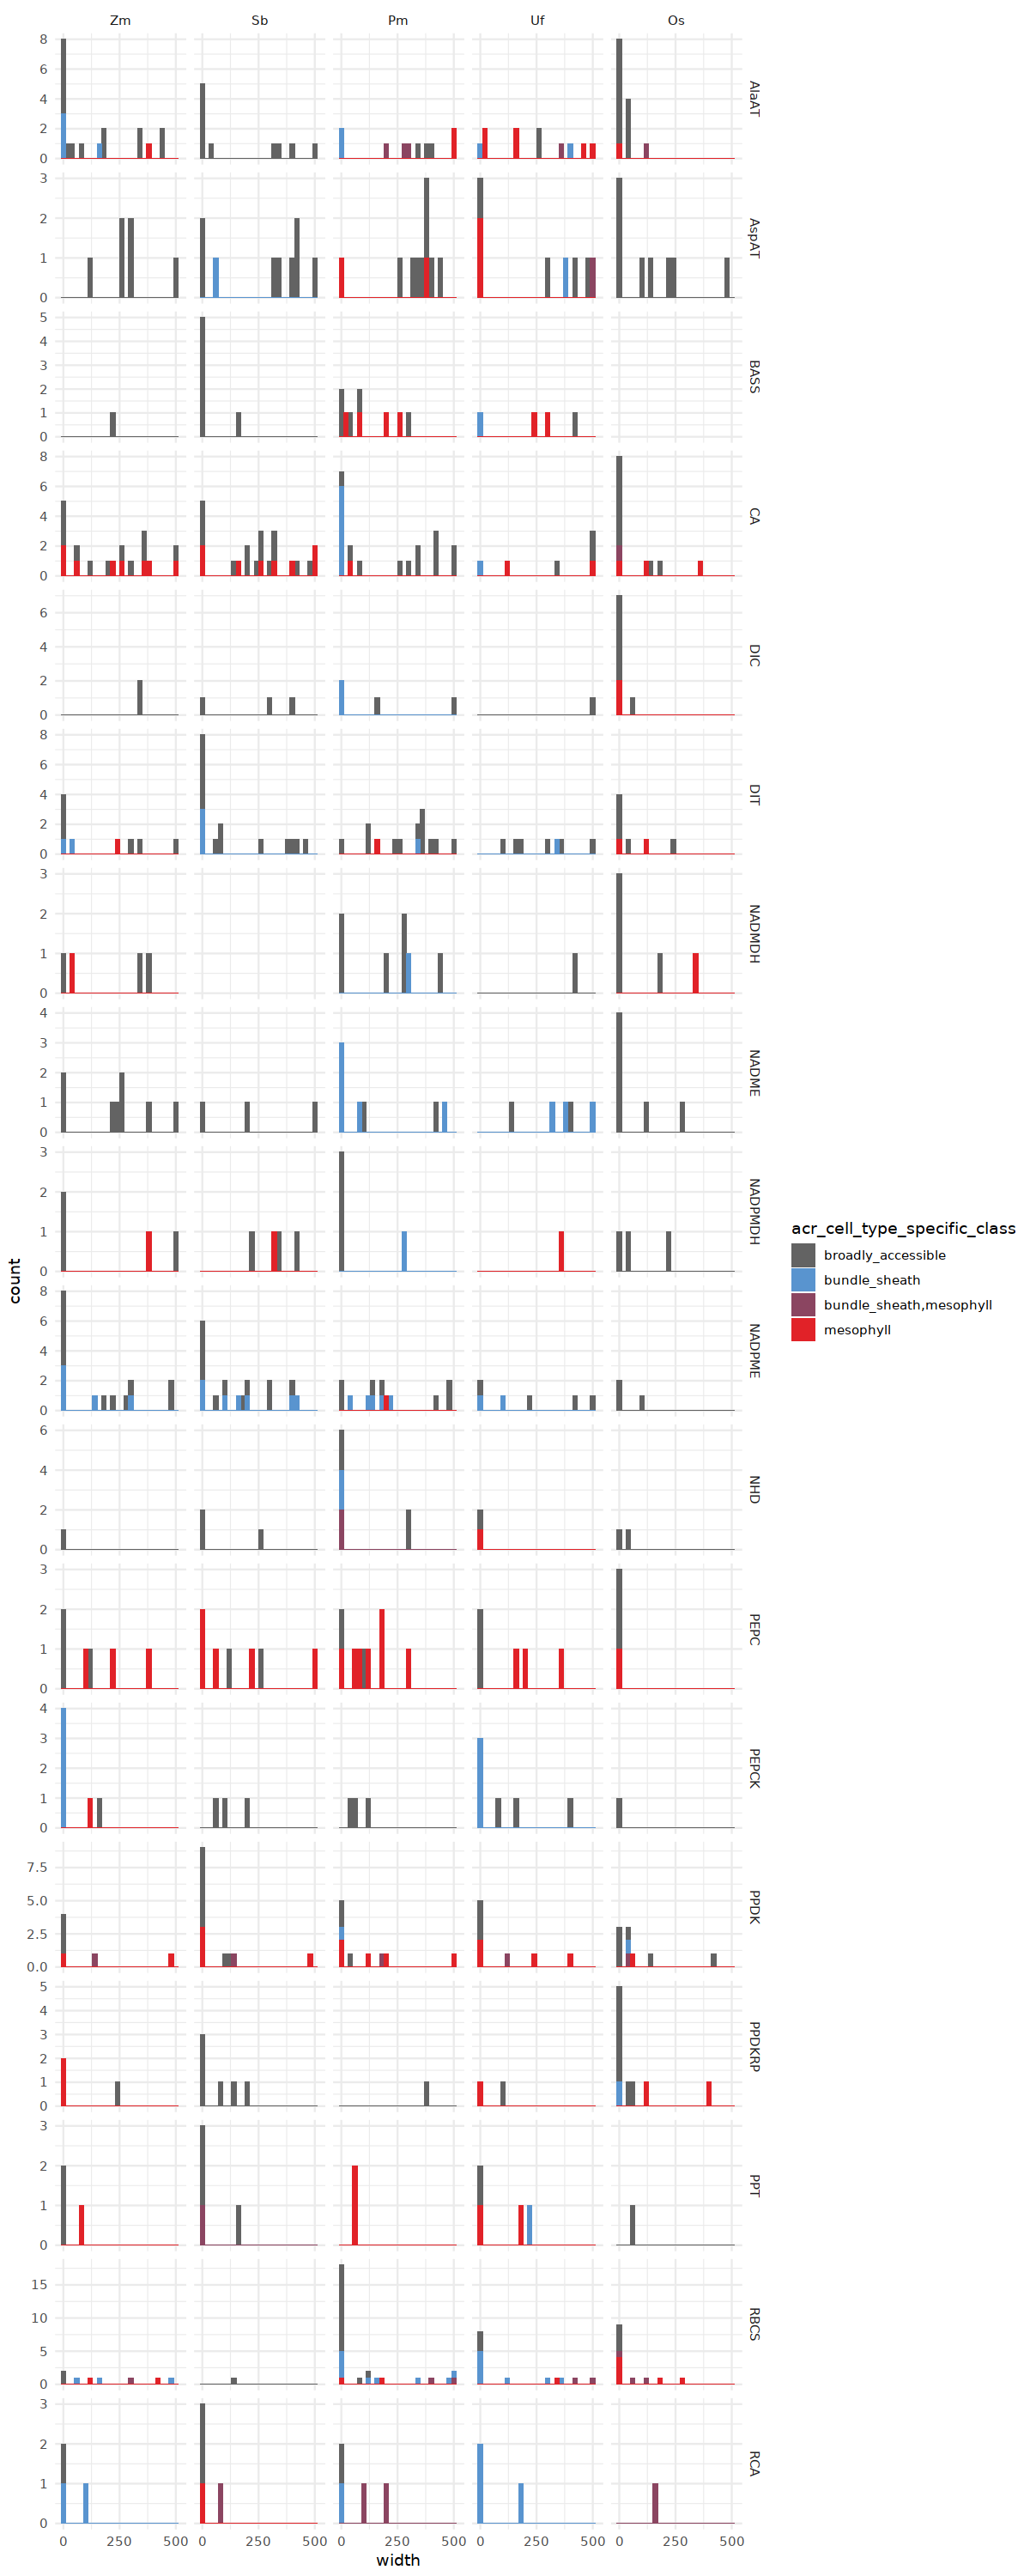

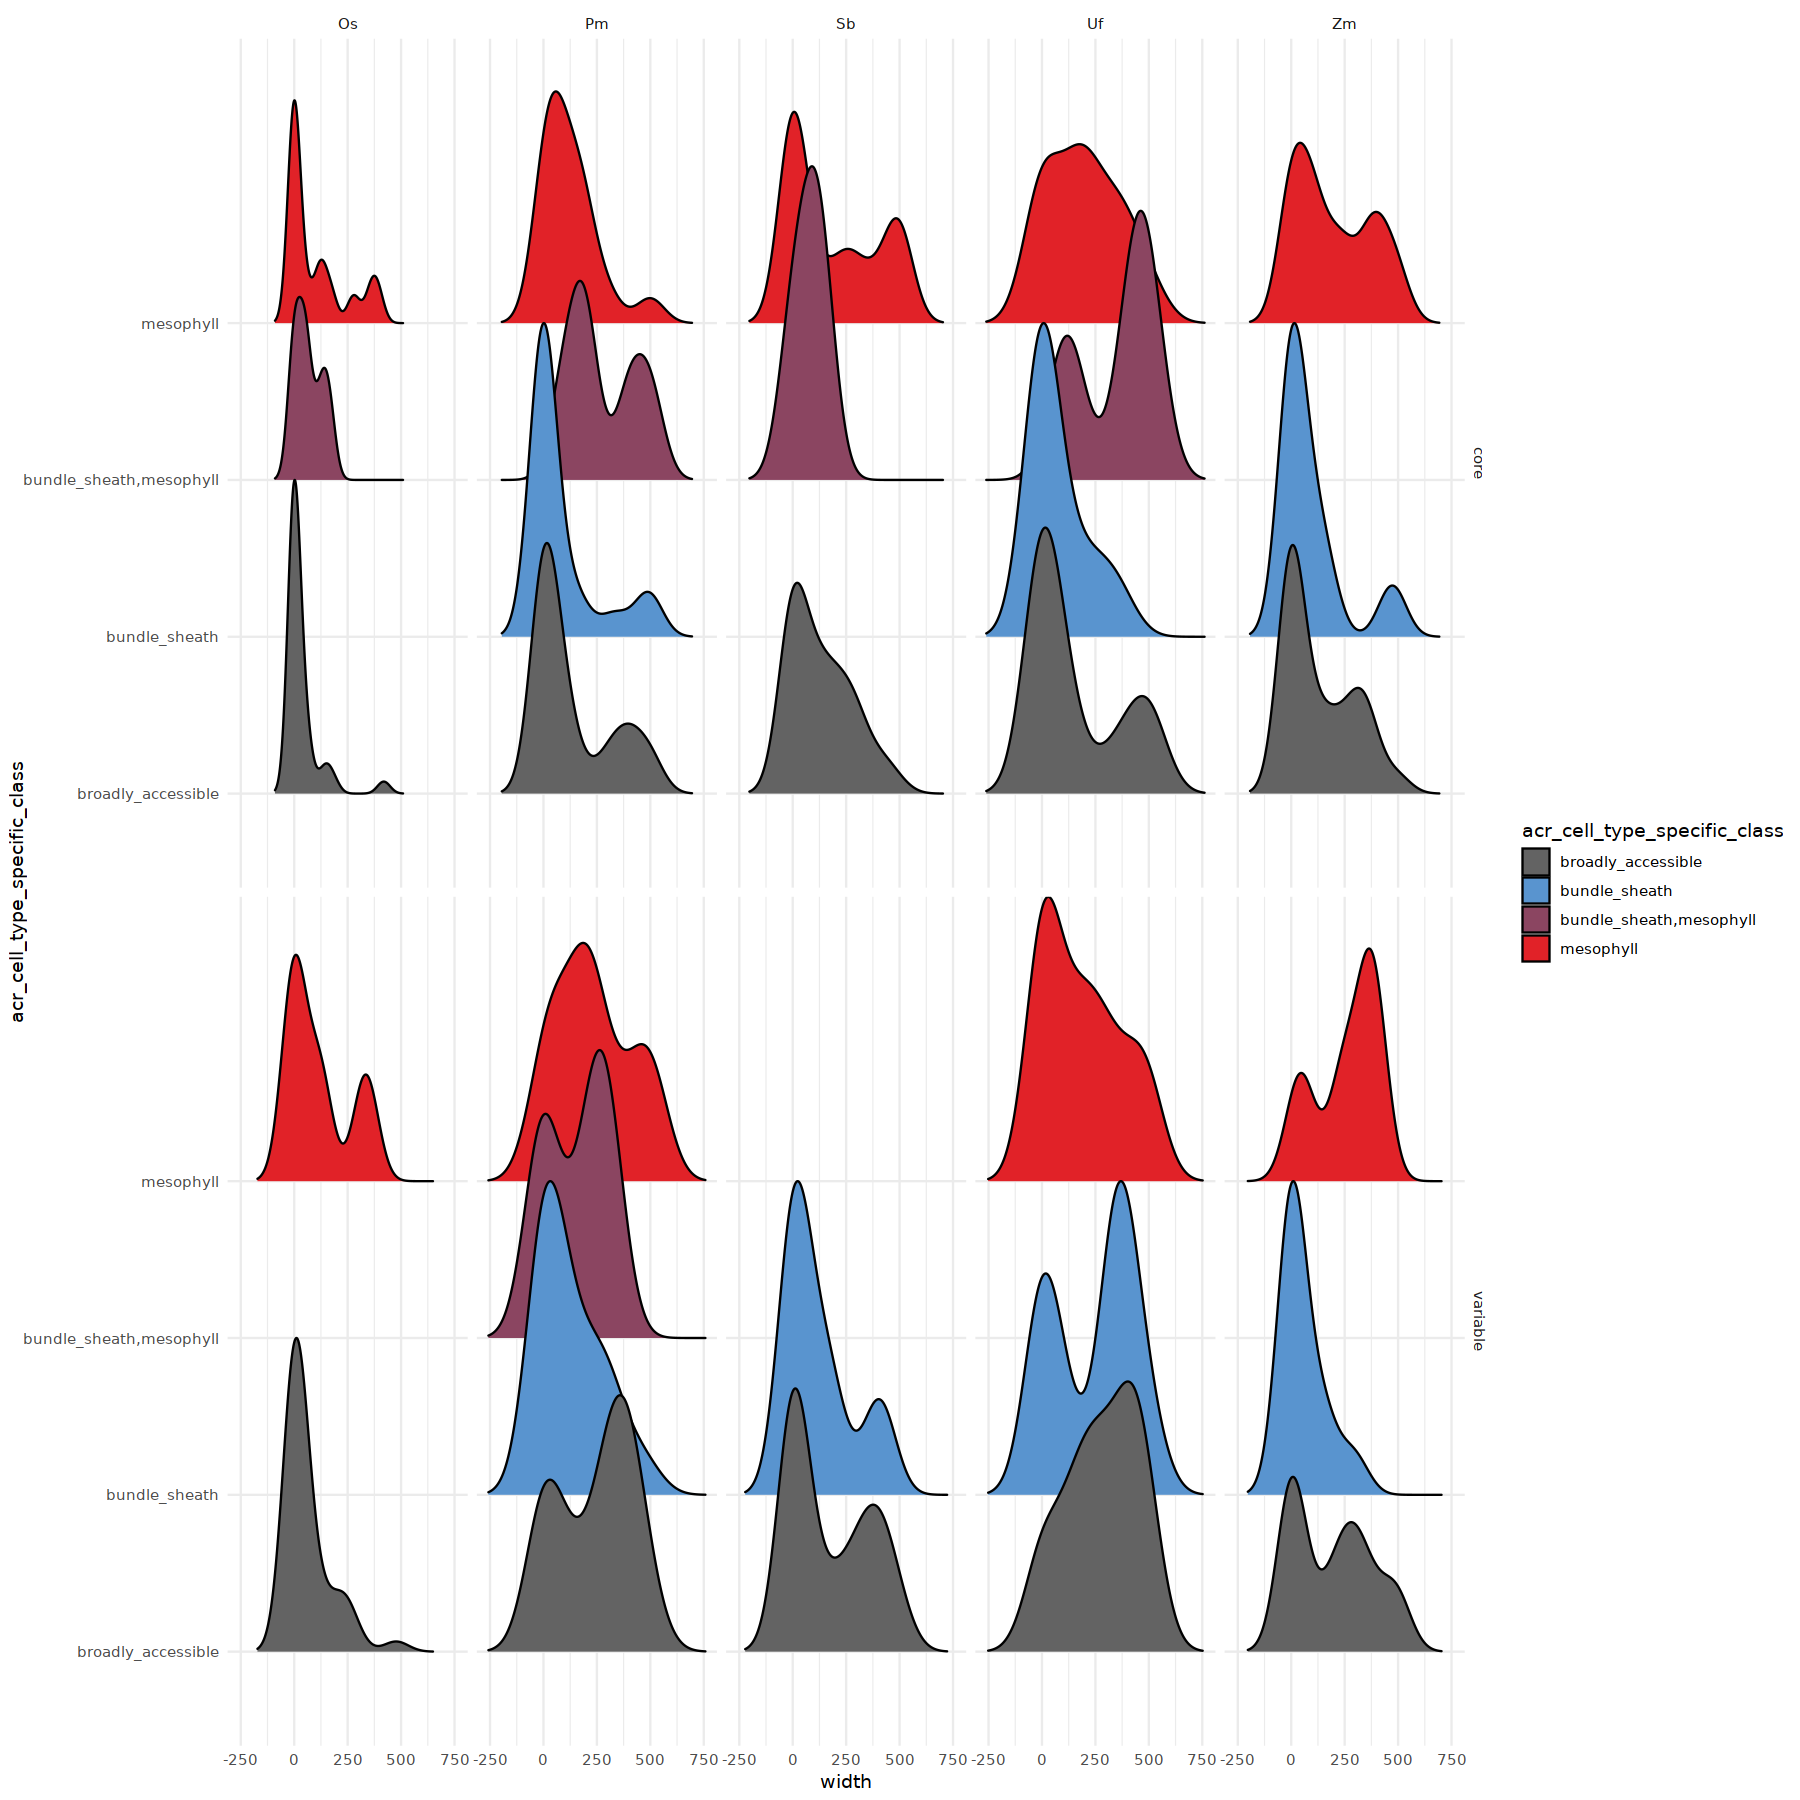

In [192]:
library(ggridges)
options(repr.plot.width=10, repr.plot.height=25)
acr_conservation_width_histogram <- acrs_combined_conservation %>%
    filter(acr_cell_type_specific_class %in% c("broadly_accessible", "mesophyll", "bundle_sheath", "bundle_sheath,mesophyll")) %>%
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = width, fill = acr_cell_type_specific_class)) +
    geom_histogram(binwidth = 20) +
    facet_grid(gene_family ~ species, scales = "free_y") +
    scale_fill_manual(values = c("broadly_accessible" = "#636363", 
                                 "mesophyll" = "#E12228", 
                                 "bundle_sheath" = "#5994CF", 
                                 "bundle_sheath,mesophyll" = "#8B4561")) +
    theme_minimal() +     
    scale_x_continuous(breaks = c(0, 250, 500), limits = c(NA, 520)) # Set strict limits on the x-axis

acr_conservation_width_histogram
options(repr.plot.width=15, repr.plot.height=15)
acrs_combined_conservation %>%
    dplyr::filter(acr_cell_type_specific_class %in% c("broadly_accessible", "mesophyll", "bundle_sheath", "bundle_sheath,mesophyll")) %>%
    ggplot(aes(x = width, y = acr_cell_type_specific_class, fill = acr_cell_type_specific_class)) +
    geom_density_ridges(scale = 2) +
    facet_grid(enzyme_class ~ species) +
    theme_ridges() + # Optional: Adds a suitab +
    scale_fill_manual(values = c("broadly_accessible" = "#636363", 
                                 "mesophyll" = "#E12228", 
                                 "bundle_sheath" = "#5994CF", 
                                 "bundle_sheath,mesophyll" = "#8B4561")) +
    theme_minimal()

In [193]:

ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_5/conservation.width.pdf", 
       plot = acr_conservation_width_histogram, device = "pdf", width = 10, height = 20)


Warning message:
“Removed 183 rows containing missing values (`geom_bar()`).”


In [107]:
acrs_combined_conservation %>% 
    dplyr::filter(gene_family == "NADME" & species == "Uf") 

locus,acr,acr_cell_type_specific_class,species,enzyme_location,gene_family,width,enzyme_class
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Uf__NADME_1,scACR_25845,broadly_accessible,Uf,bundle_sheath,NADME,406,variable
Uf__NADME_1,scACR_25846,bundle_sheath,Uf,bundle_sheath,NADME,371,variable
Uf__NADME_2,scACR_25852,bundle_sheath,Uf,bundle_sheath,NADME,0,variable
Uf__NADME_2,scACR_25853,bundle_sheath,Uf,bundle_sheath,NADME,316,variable
Uf__NADME_2,scACR_25854,broadly_accessible,Uf,bundle_sheath,NADME,149,variable


## Investigating Whether Closely Related Species share more Regulatory Loci

In [47]:
racr_ranges_species_aware <- as_iranges(racr_regions) %>% 
    group_by(acr, rspecies, species) %>% 
    reduce_ranges() %>% 
    as.data.frame()


In [52]:
conservation_acrs_updated_width_calculations_species_aware <- acr_scored_conservation %>% 
    dplyr::select(-rWidth) %>% 
    dplyr::left_join(racr_ranges_species_aware, by = c("acr", "species", "rspecies")) %>% 
    dplyr::filter(width < 500) %>% 
    dplyr::select(species, acr, acr_cell_type_specific_class, locus, rspecies, width) %>% 
    dplyr::distinct() %>% 
    dplyr::group_by(species, acr,acr_cell_type_specific_class, locus,rspecies) %>% 
    summarise(width = sum(width))


conservation_acrs_updated_width_calculations_species_aware

Warning message in dplyr::left_join(., racr_ranges_species_aware, by = c("acr", :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 8 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
`summarise()` has grouped output by 'species', 'acr',
'acr_cell_type_specific_class', 'locus'. You can override using the `.groups`
argument.


species,acr,acr_cell_type_specific_class,locus,rspecies,width
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
Os,scACR_10142,broadly_accessible,Os__AlaAT_2,Pm,32
Os,scACR_10142,broadly_accessible,Os__AlaAT_2,Uf,27
Os,scACR_10144,broadly_accessible,Os__AlaAT_2,Sb,41
Os,scACR_10144,broadly_accessible,Os__AlaAT_2,Zm,39
Os,scACR_1059,broadly_accessible,Os__NADPME_1,Sb,69
Os,scACR_1059,broadly_accessible,Os__NADPME_1,Uf,50
Os,scACR_1059,broadly_accessible,Os__NADPME_1,Zm,45
Os,scACR_11253,broadly_accessible,Os__NADME_1,Pm,88
Os,scACR_11253,broadly_accessible,Os__NADME_1,Sb,25


In [53]:
conservation_acrs_updated_width_calculations_species_aware %>% 
    dplyr::group_by(species, rspecies,) %>% 
    dplyr::summarise(total = sum(width))

`summarise()` has grouped output by 'species'. You can override using the
`.groups` argument.


species,rspecies,total
<chr>,<chr>,<int>
Os,Pm,4015
Os,Sb,2968
Os,Uf,3226
Os,Zm,2491
Pm,Os,5602
Pm,Sb,13425
Pm,Uf,20433
Pm,Zm,8399
Sb,Os,3229


## Do Cell Type Specific ACR Conservation


In [94]:
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_5/realtive_conservation.BS_ACRs.pdf", 
       plot = conservation_plots_bs_regions, device = "pdf", width = 30, height = 20)


## Testing Convseration By Enzyme Class

In [34]:
enzyme_family_class <- data.frame(gene_family=c("AlaAT", "AspAT", "CA", "DIC", "DIT", "NADMDH", "NADME", "NADPMDH", "NADPME", "NHD", "PEPCK", "PEPC", "PPDKRP", "PPDK", "PPT", "RBCS", "RCA", "BASS"),
           Type=c("variable", "variable", "core", "core", "variable", "variable", "variable", "variable", "variable", "variable", "core", "core", "core", "core", "core", "core", "core", "variable"))


In [1]:
head(enzyme_family_class)

ERROR: Error in head(enzyme_family_class): object 'enzyme_family_class' not found


In [50]:
combined_gene_family_class <- left_join(combined_gene_family_merged_cell_types_graphing, enzyme_family_class, by = c("gene_family"))

In [57]:
head(combined_gene_family_class)

locus,species_other,loci,gene_family,number,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion,Type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
Os AlaAT 1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,conserved_acrs_all,0,0.0000000,variable
Os AlaAT 1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,non_conserved_acrs_all,1,1.0000000,variable
Os AlaAT 2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,conserved_acrs_all,2,0.3333333,variable
Os AlaAT 2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,non_conserved_acrs_all,4,0.6666667,variable
Os AlaAT 3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,conserved_acrs_all,2,0.5000000,variable
Os AlaAT 3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,non_conserved_acrs_all,2,0.5000000,variable


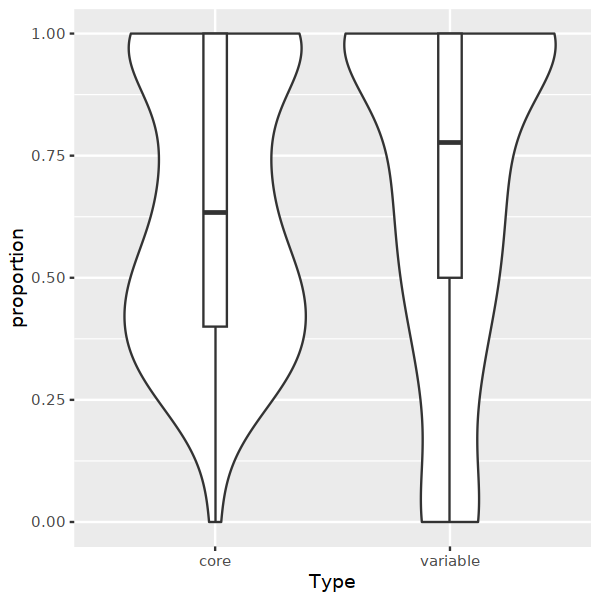

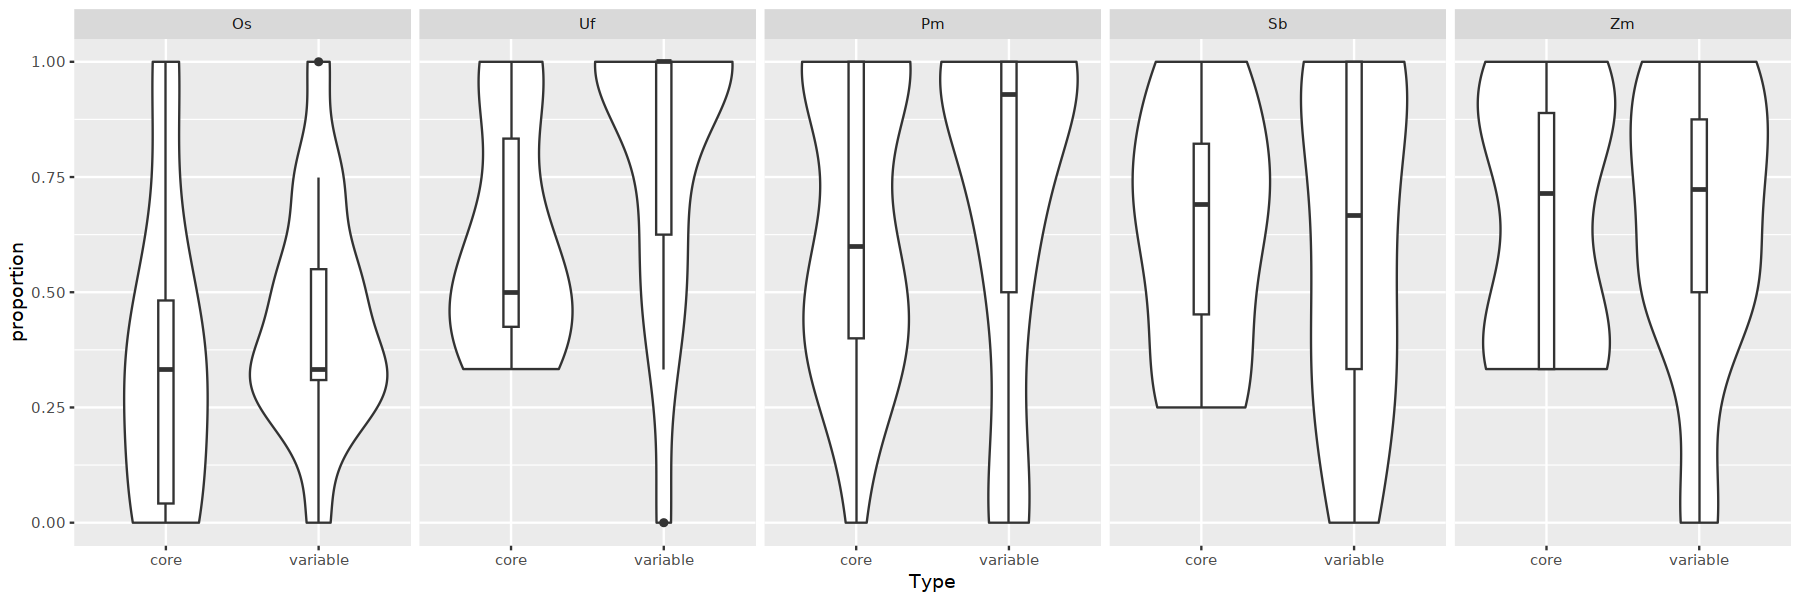

In [63]:

options(repr.plot.width=5, repr.plot.height=5)
combined_gene_family_class.no_c3 <- combined_gene_family_class %>% 
    dplyr::filter(species != "Os") %>% 
    dplyr::filter(acr_type_cons_noncons == "conserved_acrs_all") %>% 
    ggplot(., aes(x = Type, y = proportion)) + geom_violin() +
    geom_boxplot(width=0.1)

combined_gene_family_class.no_c3


options(repr.plot.width=15, repr.plot.height=5)
combined_gene_family_class$species <- factor(combined_gene_family_class$species, 
                                             levels = c("Os", "Uf", "Pm", "Sb", "Zm"))

# Filtering and plotting
combined_gene_family_class %>%
    dplyr::filter(acr_type_cons_noncons == "conserved_acrs_all") %>%
    ggplot(aes(x = Type, y = proportion)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    facet_grid(. ~ species)

In [67]:
head(combined_gene_family)

locus,species,loci,gene_family,number,acr_cell_type_specific_class,enzyme_location,total_acrs,acr_class,acr_count,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Os__AlaAT_1,Os,AlaAT_1,AlaAT,1,broadly_accessible,mesophyll,1,conserved_acr_count,0,0.0000000
Os__AlaAT_1,Os,AlaAT_1,AlaAT,1,broadly_accessible,mesophyll,1,non_conserved_acrs,1,1.0000000
Os__AlaAT_2,Os,AlaAT_2,AlaAT,2,broadly_accessible,mesophyll,6,conserved_acr_count,2,0.3333333
Os__AlaAT_2,Os,AlaAT_2,AlaAT,2,broadly_accessible,mesophyll,6,non_conserved_acrs,4,0.6666667
Os__AlaAT_3,Os,AlaAT_3,AlaAT,3,broadly_accessible,mesophyll,4,conserved_acr_count,2,0.5000000
Os__AlaAT_3,Os,AlaAT_3,AlaAT,3,broadly_accessible,mesophyll,4,non_conserved_acrs,2,0.5000000


In [80]:
unique(combined_gene_family_class$acr_cell_type_specific_class)

[1] "broadly_accessible"                          
 [2] "bundle_sheath,mesophyll"                     
 [3] "mesophyll"                                   
 [4] "unknown_cells_2"                             
 [5] "protoderm"                                   
 [6] "bundle_sheath,epidermis,mesophyll"           
 [7] "epidermis,unknown_cells_1"                   
 [8] "bundle_sheath,companion_cell"                
 [9] "bundle_sheath,unknown_cells_2"               
[10] "epidermis,protoderm,unknown_cells_1"         
[11] "unknown_cells_1"                             
[12] "bundle_sheath"                               
[13] "epidermis"                                   
[14] "mesophyll,unknown_cells_2"                   
[15] "bundle_sheath,mesophyll,unknown_cells_2"     
[16] "epidermis,protoderm"                         
[17] "bundle_sheath,companion_cells_sieve_elements"
[18] "companion_cells_sieve_elements"              
[19] "procambium"                                  
[20] "procambial_meristem"                         
[21] "bundle_sheath,mesophyll,procambial_meristem" 
[22] "epidermis,mesophyll"                         
[23] "epidermis,mesophyll,protoderm"               
[24] "bundle_sheath,epidermis"

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`
Caused by error in `$<-.data.frame`:
! replacement has 1 row, data has 0”


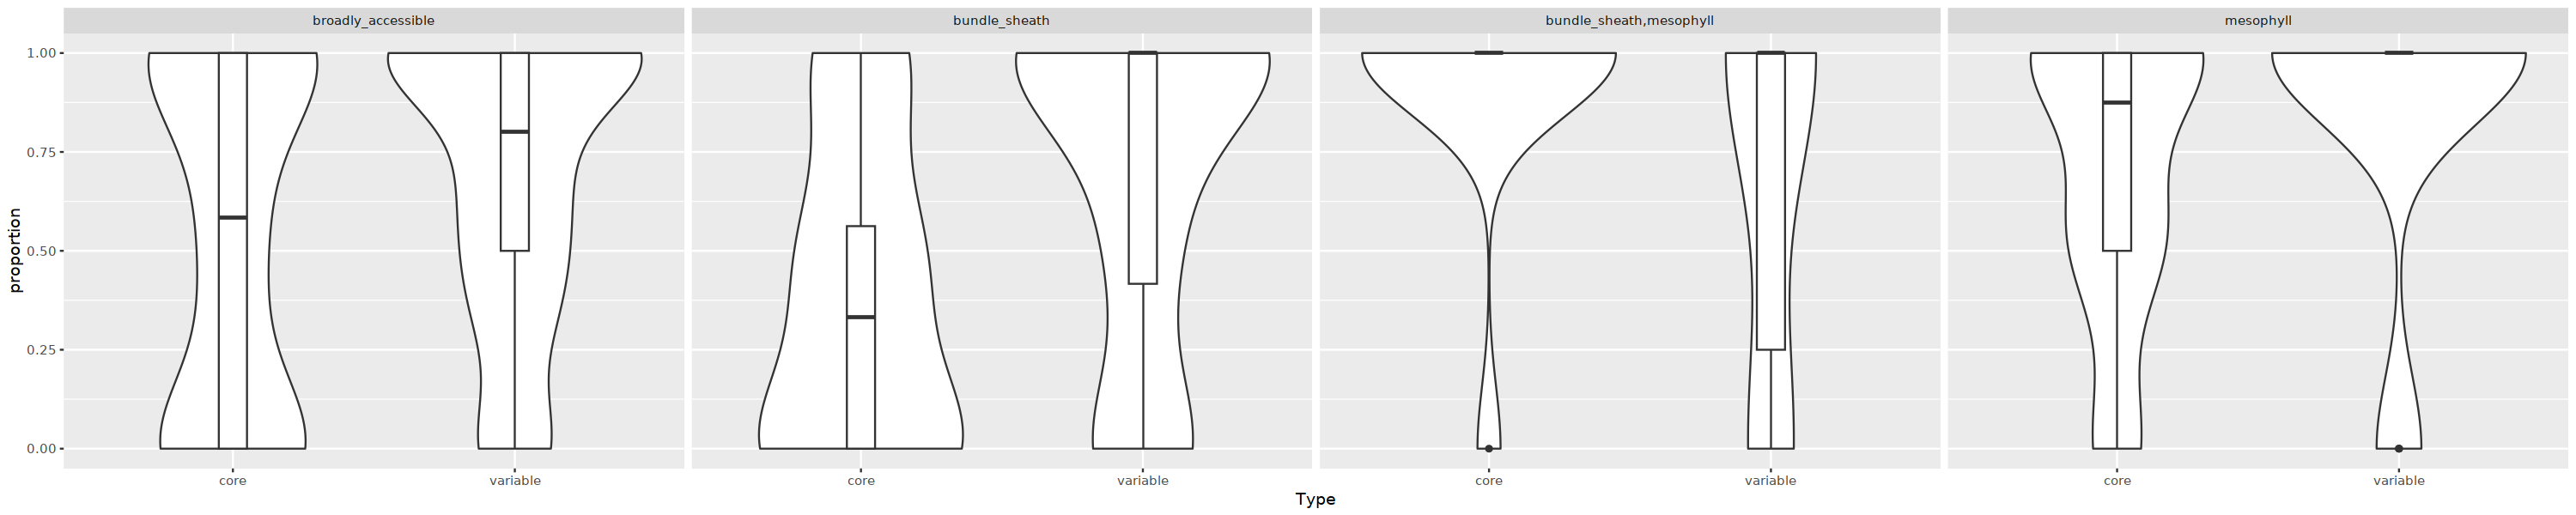

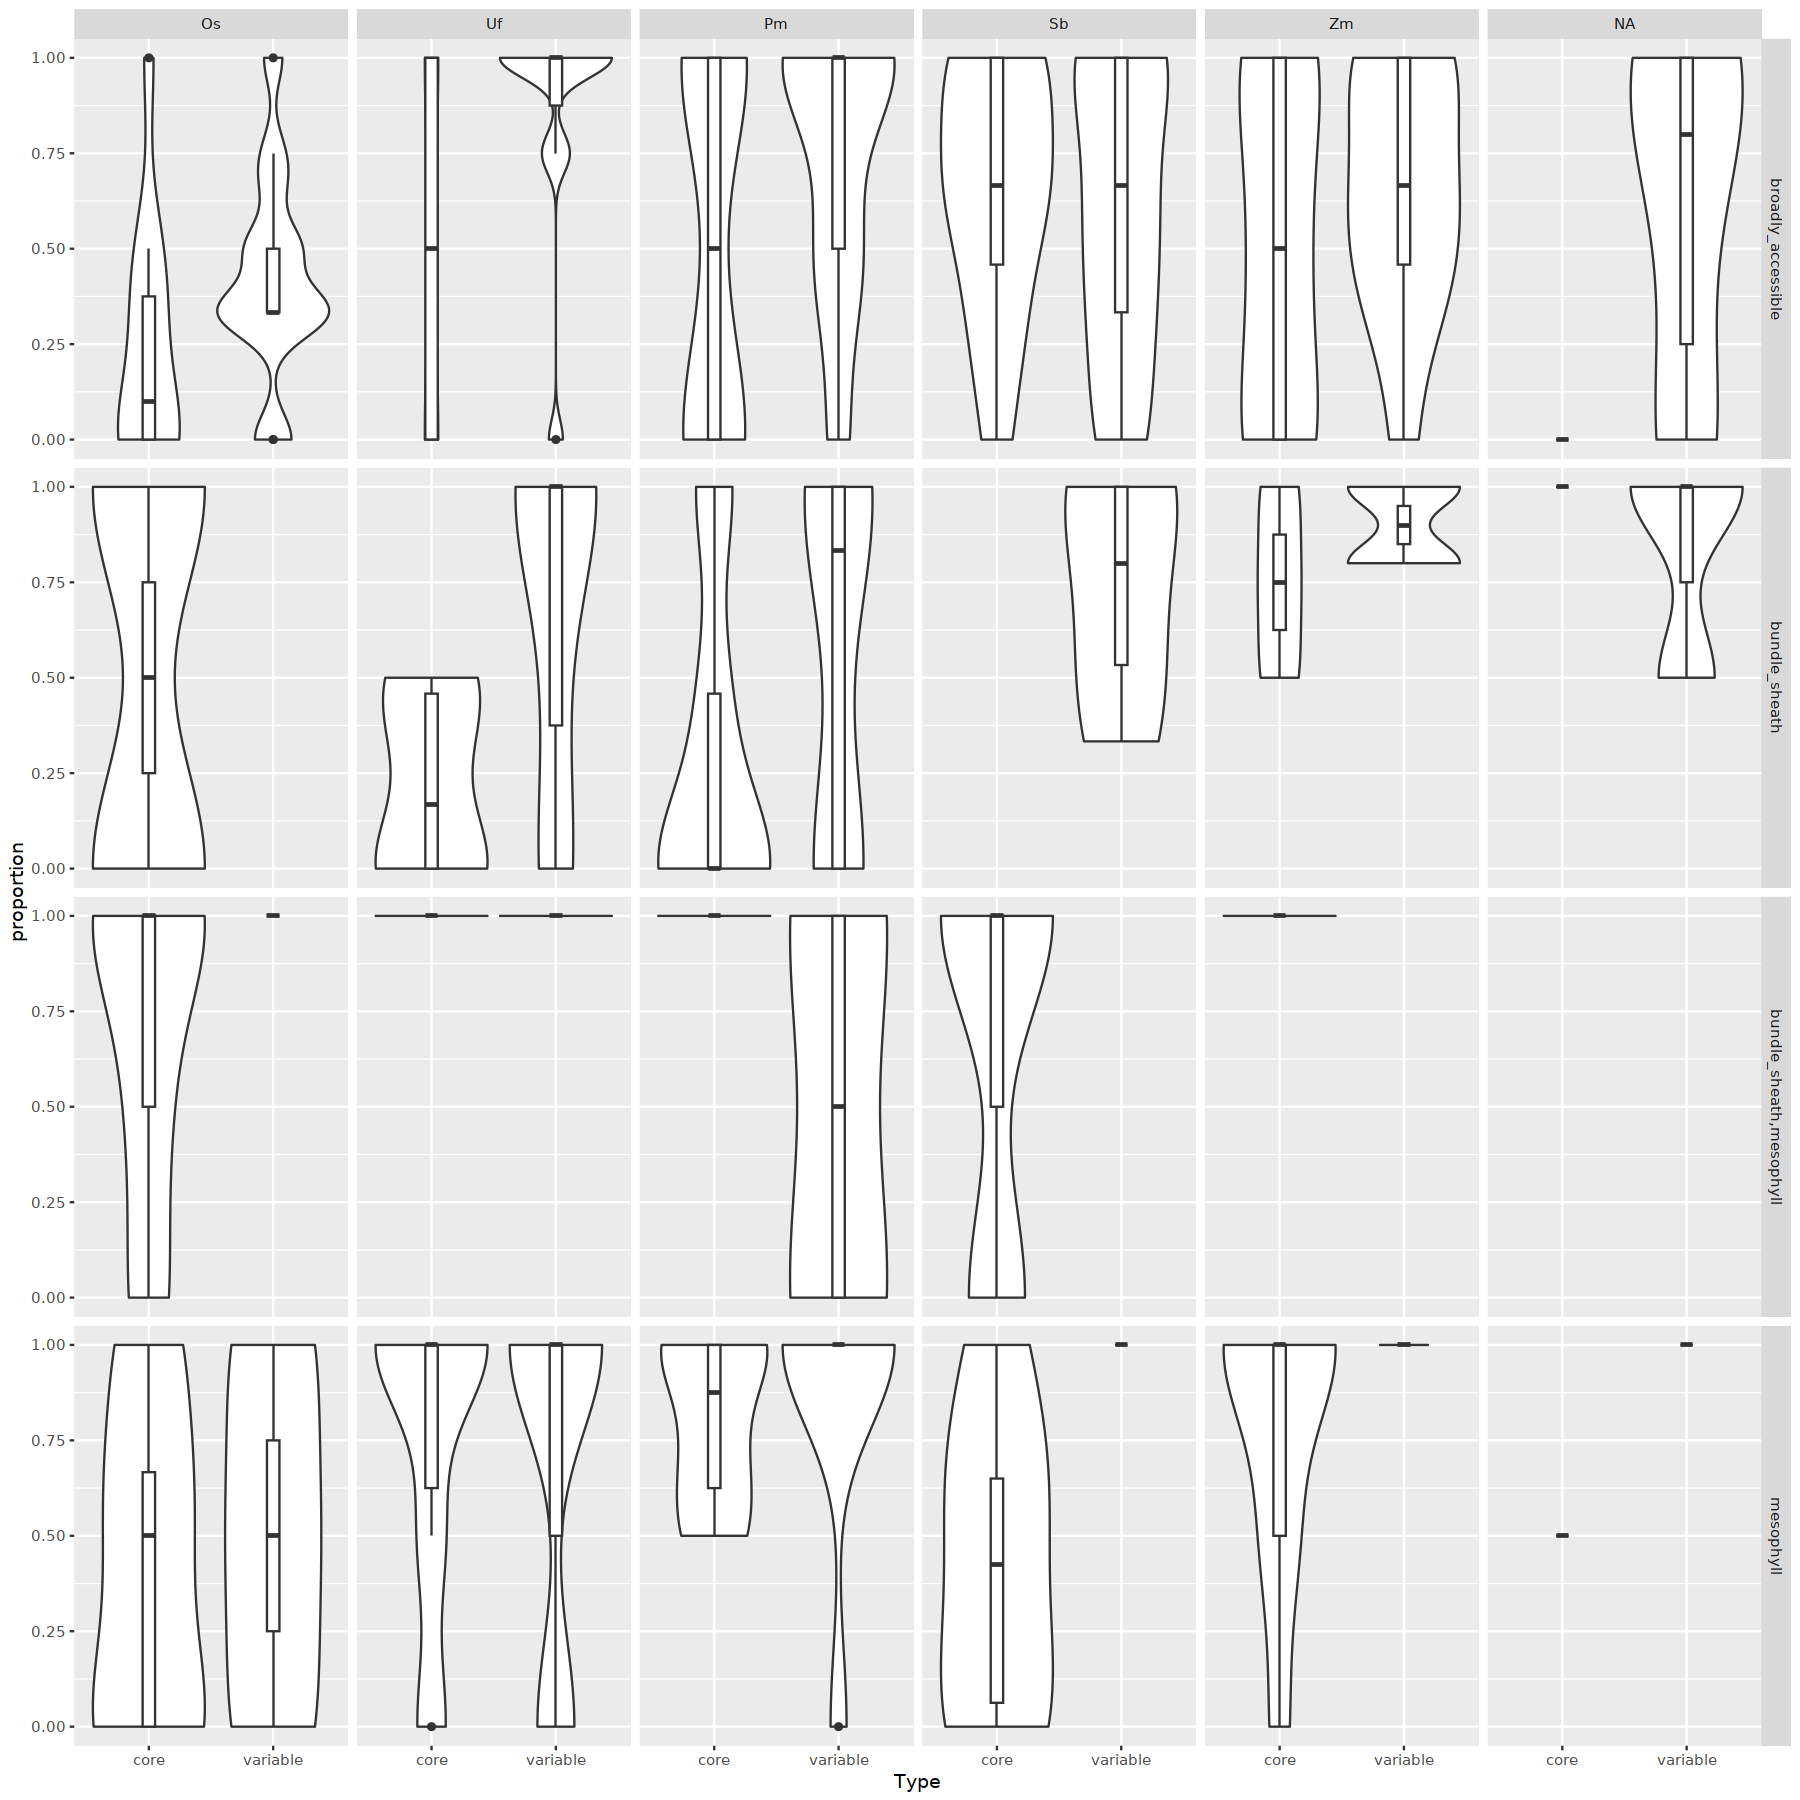

In [87]:
combined_gene_family_class <- left_join(combined_gene_family, enzyme_family_class, by = c("gene_family"))

options(repr.plot.width=25, repr.plot.height=5)
combined_gene_family_class.no_c3 <- combined_gene_family_class %>% 
    dplyr::filter(species != "Os") %>% 
    dplyr::filter(acr_class == "conserved_acr_count") %>% 
    dplyr::filter(acr_cell_type_specific_class %in% c("mesophyll", "bundle_sheath", "broadly_accessible", "bundle_sheath,mesophyll")) %>% 
    ggplot(., aes(x = Type, y = proportion)) + geom_violin() +
    geom_boxplot(width=0.1) + facet_grid(.~acr_cell_type_specific_class)

combined_gene_family_class.no_c3


options(repr.plot.width=15, repr.plot.height=15)
combined_gene_family_class$species <- factor(combined_gene_family_class$species, 
                                             levels = c("Os", "Uf", "Pm", "Sb", "Zm"))


options(repr.plot.width=15, repr.plot.height=15)
# Filtering and plotting
combined_gene_family_class %>%
    dplyr::filter(acr_class == "conserved_acr_count") %>%
    dplyr::filter(acr_cell_type_specific_class %in% c("mesophyll", "bundle_sheath", "broadly_accessible", "bundle_sheath,mesophyll")) %>% 
    ggplot(., aes(x = Type, y = proportion)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    facet_grid(acr_cell_type_specific_class ~species )

In [96]:
# bs_specific_enzymes_bs_acrs <- combined_gene_family %>% 
#     dplyr::filter(cts_acts == "bundle_sheath") #&& type == "bundle_sheath")

# ms_specific_enzymes_ms_acrs <- combined_gene_family %>% 
#     dplyr::filter(cts_acts == "mesophyll") # && type == "mesophyll")


# ms_specific_enzymes_bs_acrs <- combined_gene_family %>% 
#     dplyr::filter(cts_acts == "mesophyll" && type == "bundle_sheath")


# options(repr.plot.width=20, repr.plot.height=20)
# # Generate the barplot
# ggplot(bs_specific_enzymes_bs_acrs, aes(x = name, y = proportion, fill = acr_class)) +
#   geom_bar(stat = "identity") +
#   #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
#    labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
#    theme_minimal() +
#   facet_wrap(.~gene_family, scales = "free") +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) + 
#     ggtitle("BS Speficifc ACR Conservastion") # Adjust text angle and size for better readability

# ggplot(ms_specific_enzymes_ms_acrs, aes(x = name, y = proportion, fill = acr_class)) +
#   geom_bar(stat = "identity") +
#   #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
#    labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
#    theme_minimal() +
#   facet_wrap(.~gene_family, scales = "free") +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) +# Adjust text angle and size for better readability
#   ggtitle("MS Speficifc ACR Conservastion")


# # ggplot(ms_specific_enzymes_bs_acrs, aes(x = name, y = proportion, fill = acr_class)) +
# #   geom_bar(stat = "identity") +
# #   #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
# #    labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
# #    theme_minimal() +
# #   facet_wrap(.~gene_family, scales = "free") +
# #   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) # Adjust text angle and size for better readability

ERROR: [1m[33mError[39m in `dplyr::filter()`:[22m
[1m[22m[36mℹ[39m In argument: `cts_acts == "bundle_sheath"`.
[1mCaused by error:[22m
[33m![39m object 'cts_acts' not found


In [ ]:
combined_gene_family <- combined_gene_family %>%
  group_by(name, acr_class) %>%
  mutate(total = sum(acr_count)) %>%
  ungroup() %>%
  mutate(proportion = acr_count / total)

# Generate the barplot
ggplot(combined_gene_family, aes(x = name, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
  theme_minimal() +
  facet_wrap(cts_acts~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) # Adjust text angle and 

In [12]:
combined_counts_cons

locus,species,loci,gene_family,number,cell_type,number_acrs_per_locus,number_passing_loci,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
Sb__CA_2,Sb,CA_2,CA,2,ms,7,7,1.0000000
Uf__RBCS_3,Uf,RBCS_3,RBCS,3,bs,7,NA,NA
Pm__NADME_1,Pm,NADME_1,NADME,1,bs,6,NA,NA
Uf__PPDK_1,Uf,PPDK_1,PPDK,1,ms,6,5,0.8333333
Pm__NADME_2,Pm,NADME_2,NADME,2,bs,5,5,1.0000000
Sb__NADPME_2,Sb,NADPME_2,NADPME,2,bs,5,4,0.8000000
Sb__PEPC_1,Sb,PEPC_1,PEPC,1,ms,5,4,0.8000000
Uf__PEPCK_1,Uf,PEPCK_1,PEPCK,1,bs,5,3,0.6000000
Zm__CA_3,Zm,CA_3,CA,3,ms,5,5,1.0000000


In [56]:
combined_df %>% 
    dplyr::filter(locus == "Pm__NADME_1")

qChr,qStart,qEnd,acr,acr_cell_type,locus,pval,refFile,rChr,rStart,rEnd,rName,rWidth,cell_type,species
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
CM009690.2,32769759,32770260,scACR_5398,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
CM009690.2,32771517,32772018,scACR_5399,bundle_sheath,Pm__NADME_1,0.0001666611,.,.,-1,-1,.,0,bs,PM
CM009690.2,32773434,32773935,scACR_5401,bundle_sheath,Pm__NADME_1,0.0001333289,.,.,-1,-1,.,0,bs,PM
CM009690.2,32777764,32778265,scACR_5402,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
CM009690.2,32779390,32779891,scACR_5403,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
CM009690.2,32786382,32786883,scACR_5405,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
